<a href="https://colab.research.google.com/github/adarshtomar333/Hand-Written-Character-Recognition/blob/main/hcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR']  = '/content'
!kaggle datasets download -d vaibhao/handwritten-characters
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Validation/F/167.jpg  
  inflating: dataset/Validation/F/168.jpg  
  inflating: dataset/Validation/F/169.jpg  
  inflating: dataset/Validation/F/17.jpg  
  inflating: dataset/Validation/F/170.jpg  
  inflating: dataset/Validation/F/171.jpg  
  inflating: dataset/Validation/F/172.jpg  
  inflating: dataset/Validation/F/173.jpg  
  inflating: dataset/Validation/F/174.jpg  
  inflating: dataset/Validation/F/175.jpg  
  inflating: dataset/Validation/F/176.jpg  
  inflating: dataset/Validation/F/177.jpg  
  inflating: dataset/Validation/F/178.jpg  
  inflating: dataset/Validation/F/179.jpg  
  inflating: dataset/Validation/F/18.jpg  
  inflating: dataset/Validation/F/180.jpg  
  inflating: dataset/Validation/F/181.jpg  
  inflating: dataset/Validation/F/182.jpg  
  inflating: dataset/Validation/F/183.jpg  
  inflating: dataset/Validation/F/184.jpg  
  inflating: dataset/Validation/F/185.jpg  
  inflating: dataset/Valida

In [3]:
# Verify if the directories exist and print some sample files
train_image_dir = '/content/Train'
test_image_dir = '/content/Validation'

if not os.path.exists(train_image_dir) or not os.path.exists(test_image_dir):
    raise Exception("Image directories not found. Please check the paths.")



In [4]:


# Define the paths to the directories
train_dir = '/content/dataset/Train'
test_dir = '/content/dataset/Validation'

# Load and preprocess the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=32,
    image_size=(28, 28),
    shuffle=True
)

# Load and preprocess the testing dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=32,
    image_size=(28, 28),
    shuffle=True
)

# Extract class names before mapping
class_names = train_dataset.class_names
num_classes = len(class_names)

# Normalize the images to the range [0, 1]
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

# Convert datasets to use in the model
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Found 834036 files belonging to 39 classes.
Found 22524 files belonging to 39 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 951s 36ms/step - accuracy: 0.8790 - loss: 0.4000 - val_accuracy: 0.9364 - val_loss: 0.2069
Epoch 2/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 923s 34ms/step - accuracy: 0.9413 - loss: 0.1735 - val_accuracy: 0.9456 - val_loss: 0.1771
Epoch 3/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 835s 32ms/step - accuracy: 0.9462 - loss: 0.1577 - val_accuracy: 0.9470 - val_loss: 0.1726
Epoch 4/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 839s 32ms/step - accuracy: 0.9485 - loss: 0.1497 - val_accuracy: 0.9498 - val_loss: 0.1643
Epoch 5/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 825s 32ms/step - accuracy: 0.9495 - loss: 0.1449 - val_accuracy: 0.9488 - val_loss: 0.1718
Epoch 6/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 865s 32ms/step - accuracy: 0.9506 - loss: 0.1415 - val_accuracy: 0.9455 - val_loss: 0.1790
Epoch 7/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 835s 32ms/step - accuracy: 0.9513 - loss: 0.1387 - val_accuracy: 0.9474 - val_loss: 0.1806
Epoch 8/10
26064/26064 ━━━━━━━━━━━━━━━━━━━━ 854s 32ms/s

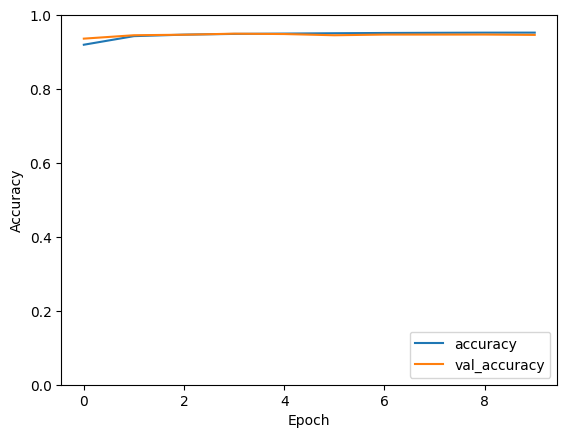

In [6]:
# Visualize training results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [8]:
# Save the model to an .h5 file
model.save('handwritten_character_recognition_model.h5')


In [9]:
# Import the files module for downloading files
from google.colab import files

# Download the .h5 file
files.download('handwritten_character_recognition_model.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GUI
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
import json

# Load the model
model_path = r'/content/handwritten_character_recognition_model.h5'  # Adjust the path accordingly
model = tf.keras.models.load_model(model_path)

# Load the class labels
with open(r'/content/class_labels.json', 'r') as f:  # Adjust the path accordingly
    class_labels = json.load(f)
    class_labels = {int(k): v for k, v in class_labels.items()}

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))  # Adjust size as per model input
    img = img.convert('L')  # Convert to grayscale if necessary
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)
    return img

def predict_character(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    character = class_labels[predicted_class]
    return character

def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img = img.resize((200, 200))  # Resize for display purposes
        img = ImageTk.PhotoImage(img)
        panel.config(image=img)
        panel.image = img
        character = predict_character(file_path)
        result_label.config(text=f'Predicted Character: {character}')

# Create the main window
root = tk.Tk()
root.title("Character Recognition")

# Set window background color
root.configure(bg='#ADD8E6')

# Create a panel to display the image
panel = tk.Label(root, bg='#ADD8E6')
panel.pack(pady=10)

# Create a button to upload the image
upload_btn = tk.Button(root, text="Upload Image", command=upload_image, font=('Helvetica', 14), bg='#4CAF50', fg='white')
upload_btn.pack(pady=10)

# Create a label to display the result
result_label = tk.Label(root, text="Predicted Character: ", font=('Helvetica', 16, 'bold'), bg='#ADD8E6', fg='#FF4500')
result_label.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()